In [1]:
import utils
from utils import *
import xgboost as xgb

%matplotlib inline


/home/ubuntu/anaconda2/envs/qenv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load features

In [2]:
# q1_data = np.load(open(Q1_TRAINING_DATA_FILE, 'rb'))
# q2_data = np.load(open(Q2_TRAINING_DATA_FILE, 'rb'))


In [2]:
abhishek_train = pd.read_csv(data_home+"abhishek_train_features.csv")
abhishek_test = pd.read_csv(data_home+"abhishek_test_features.csv")

In [22]:
# def get_and_normalize_features(df, feature_list):
    
#     np_version = np.array(df.ix[:,feature_list])
# #     np_version = np.nan_to_num(np_version)
# #     np_version = normalize(np_version ,axis=0,norm='max')
    
#     return np_version

In [23]:
# q1_features = [u'len_q1', u'len_char_q1', u'len_word_q1', u'skew_q1vec', u'kur_q1vec']
# q2_features = [u'len_q2', u'len_char_q2', u'len_word_q2', u'skew_q2vec', u'kur_q2vec']
# diff_features = abhishek_train.columns.difference(q1_features).difference(q2_features).difference(['question1','question2'])

In [24]:
# abhishek_q1_features_np = get_and_normalize_features(abhishek_train,q1_features)
# abhishek_q2_features_np = get_and_normalize_features(abhishek_train,q2_features)
# abhishek_diff_features_np = get_and_normalize_features(abhishek_train,diff_features)

In [25]:
# abhishek_q1_features_np.shape,abhishek_q2_features_np.shape,abhishek_diff_features_np.shape

In [4]:
abhishek_train.columns.values

array(['question1', 'question2', 'len_q1', 'len_q2', 'diff_len',
       'len_char_q1', 'len_char_q2', 'len_word_q1', 'len_word_q2',
       'common_words', 'fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
       'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
       'fuzz_token_set_ratio', 'fuzz_token_sort_ratio', 'wmd', 'norm_wmd',
       'cosine_distance', 'cityblock_distance', 'jaccard_distance',
       'canberra_distance', 'euclidean_distance', 'minkowski_distance',
       'braycurtis_distance', 'skew_q1vec', 'skew_q2vec', 'kur_q1vec',
       'kur_q2vec'], dtype=object)

In [27]:
# [:,['len_q1', 'len_q2', 'diff_len',
#        'len_char_q1', 'len_char_q2', 'len_word_q1', 'len_word_q2',
#        'common_words', 'fuzz_qratio', 'fuzz_WRatio', 'fuzz_partial_ratio',
#        'fuzz_partial_token_set_ratio', 'fuzz_partial_token_sort_ratio',
#        'fuzz_token_set_ratio', 'fuzz_token_sort_ratio', 'wmd', 'norm_wmd', 'skew_q1vec', 'skew_q2vec', 'kur_q1vec',
#        'kur_q2vec']

In [5]:
abhishek_train = abhishek_train.ix  [:,2:]

In [6]:
abhishek_test = abhishek_test.ix[:, 2:] 

In [7]:
abhishek_train.shape,abhishek_test.shape

((404290, 28), (2345796, 28))

#### Magic feature!

In [8]:
q_frequency_train = pd.read_csv("data/question_frequency_train.csv")
q_frequency_test = pd.read_csv("data/question_frequency_test.csv")


In [9]:
q_frequency_train.shape, q_frequency_test.shape

((404290, 6), (2345796, 5))

In [10]:
q_frequency_train  = q_frequency_train.ix[:,3:5]

In [11]:
q_frequency_test = q_frequency_test.ix[:,3:5]

In [12]:
q_frequency_train.shape, q_frequency_test.shape

((404290, 2), (2345796, 2))

#### Nostrov features

In [13]:
nostrov = pd.read_csv('data/nestrov_feats.csv')

In [14]:
nostrov.columns[10:]

Index([u'log_abs_diff_len1_len2', u'ratio_len1_len2', u'log_ratio_len1_len2',
       u'unigram_jaccard', u'unigram_all_jaccard', u'unigram_all_jaccard_max',
       u'bigram_jaccard', u'bigram_all_jaccard', u'bigram_all_jaccard_max',
       u'trigram_jaccard', u'trigram_all_jaccard', u'trigram_all_jaccard_max',
       u'quadgram_jaccard', u'quadgram_all_jaccard',
       u'quadgram_all_jaccard_max', u'quadram_tfidf_cosine',
       u'quadgram_tfidf_l2_euclidean', u'quadgram_tfidf_l1_euclidean',
       u'quadgram_tf_l2_euclidean', u'm_q1_q2_tf_oof',
       u'm_vstack_svd_q1_q1_euclidean', u'm_vstack_svd_q1_q1_cosine',
       u'm_vstack_svd_mult_q1_q2_oof', u'm_vstack_svd_absdiff_q1_q2_oof',
       u'1wl_tfidf_cosine', u'1wl_tfidf_l2_euclidean', u'1wl_tf_l2_euclidean',
       u'm_w1l_tfidf_oof'],
      dtype='object')

In [15]:
ix_train = np.where(nostrov['id'] >= 0)[0]
ix_test = np.where(nostrov['id'] == -1)[0]

In [16]:
nostrov.drop(['m_vstack_svd_mult_q1_q2_oof','m_vstack_svd_absdiff_q1_q2_oof','m_w1l_tfidf_oof','m_q1_q2_tf_oof'],
             axis=1,inplace=True)

In [17]:
nostrov.columns[10:]

Index([u'log_abs_diff_len1_len2', u'ratio_len1_len2', u'log_ratio_len1_len2',
       u'unigram_jaccard', u'unigram_all_jaccard', u'unigram_all_jaccard_max',
       u'bigram_jaccard', u'bigram_all_jaccard', u'bigram_all_jaccard_max',
       u'trigram_jaccard', u'trigram_all_jaccard', u'trigram_all_jaccard_max',
       u'quadgram_jaccard', u'quadgram_all_jaccard',
       u'quadgram_all_jaccard_max', u'quadram_tfidf_cosine',
       u'quadgram_tfidf_l2_euclidean', u'quadgram_tfidf_l1_euclidean',
       u'quadgram_tf_l2_euclidean', u'm_vstack_svd_q1_q1_euclidean',
       u'm_vstack_svd_q1_q1_cosine', u'1wl_tfidf_cosine',
       u'1wl_tfidf_l2_euclidean', u'1wl_tf_l2_euclidean'],
      dtype='object')

In [18]:
nostrov_diff = nostrov.ix[:,10:]

In [19]:
nostrov_train = nostrov_diff.iloc[ix_train]
nostrov_test = nostrov_diff.iloc[ix_test]

nostrov_train.shape, nostrov_test.shape

((404290, 24), (2345796, 24))

In [20]:
# nostrov_train.corr()

In [21]:
del nostrov, nostrov_diff

#### Nostrof Extra

In [22]:
nostrov = pd.read_csv('data/cache/nostrov_extra2.csv')

In [23]:
nostrov.columns[7:].values #7:-5

array(['m_q1_q2_tf_svd0', 'm_q1_q2_tf_svd3', 'm_q1_q2_tf_svd5',
       'm_q1_q2_tf_svd99', 'm_q1_q2_tf_svd1', 'm_q1_q2_tf_svd34',
       'm_q1_q2_tf_svd43', 'm_q1_q2_tf_svd27', 'm_q1_q2_tf_svd19',
       'm_q1_q2_tf_svd28', 'm_q1_q2_tf_svd54', 'm_q1_q2_tf_svd25',
       'm_q1_q2_tf_svd21', 'm_q1_q2_tf_svd33', 'nsvd_cityblock_distance',
       'nsvd_jaccard_distance', 'nsvd_canberra_distance',
       'nsvd_minkowski_distance', 'nsvd_braycurtis_distance'], dtype=object)

In [24]:
ix_train = np.where(nostrov['id'] >= 0)[0]
ix_test = np.where(nostrov['id'] == -1)[0]

In [25]:
nostrov_extra = nostrov.ix[:,7:]

# ['m_q1_q2_tf_svd0', 'm_q1_q2_tf_svd1', 'm_q1_q2_tf_svd100_oof',
#        'm_diff_q1_q2_tf_oof']

In [26]:
nostrov_extra_train = nostrov_extra.iloc[ix_train]
nostrov_extra_test = nostrov_extra.iloc[ix_test]

nostrov_extra_train.shape, nostrov_extra_test.shape

((404290, 19), (2345796, 19))

In [216]:
# nostrov_extra_train.corr()

In [217]:
# nostrov_extra_train.corr()

In [27]:
del nostrov, nostrov_extra

54+19+28+4

#### extra svd and n-gram features

In [2]:
extra_svd_features_v2 = pd.read_csv('data/cache/extra_features_v2.csv')

In [34]:
extra_svd_features_v2.columns[7:].values

array(['1gr_cv_euclidean', '1gr_cv_cosine', '2gr_cv_euclidean',
       '2gr_cv_cosine', '3gr_cv_euclidean', '3gr_cv_cosine',
       '4gr_cv_euclidean', '4gr_cv_cosine', '1wl_tf_l2_cosine',
       '1wl_tfidf_l1_euclidean', '1wl_tf_l1_cosine', '1wl_tf_l1_euclidean',
       'w1g_tf_q1_q2_tf_svd0', 'w1g_tf_q1_q2_tf_svd1',
       'w1g_vstack_svd_q1_q1_euclidean', 'w1g_vstack_svd_q1_q1_cosine',
       'w1g_vsvd_cityblock_distance', 'w1g_vsvd_jaccard_distance',
       'w1g_vsvd_canberra_distance', 'w1g_vsvd_minkowski_distance',
       'w1g_vsvd_braycurtis_distance', 'w2g_vstack_svd_q1_q1_euclidean',
       'w2g_vstack_svd_q1_q1_cosine', 'w2g_vsvd_cityblock_distance',
       'w2g_vsvd_jaccard_distance', 'w2g_vsvd_canberra_distance',
       'w2g_vsvd_minkowski_distance', 'w2g_vsvd_braycurtis_distance'], dtype=object)

In [3]:
ix_train = np.where(extra_svd_features_v2['id'] >= 0)[0]
ix_test = np.where(extra_svd_features_v2['id'] == -1)[0]

In [37]:
extra_svd_features_v2 = extra_svd_features_v2.ix[:,7:]

In [38]:
extra_svd_features_v2_train = extra_svd_features_v2.iloc[ix_train]
extra_svd_features_v2_test = extra_svd_features_v2.iloc[ix_test]

extra_svd_features_v2_train.shape, extra_svd_features_v2_test.shape

((404290, 28), (2345796, 28))

#### nmf features

In [3]:
nmf_features = pd.read_csv('data/cache/nmf_features.csv')

In [4]:
nmf_features.columns[5:].values

array(['nmf_hellinger1_distance', 'nmf_braycurtis_distance',
       'nmf_minkowski_distance', 'nmf_canberra_distance',
       'nmf_jaccard_distance', 'nmf_cityblock_distance',
       'nmf_cosine_distance', 'nmf_euclidean_distance'], dtype=object)

In [5]:
ix_train = np.where(nmf_features['id'] >= 0)[0]
ix_test = np.where(nmf_features['id'] == -1)[0]

In [6]:
nmf_features = nmf_features.ix[:,5:]

In [7]:
nmf_features_train = nmf_features.iloc[ix_train]
nmf_features_test = nmf_features.iloc[ix_test]

nmf_features_train.shape, nmf_features_test.shape

((404290, 8), (2345796, 8))

#### sentiment

In [7]:
sentiment_train = pd.read_csv("data/cache/sentiment_train.csv")
sentiment_test = pd.read_csv("data/cache/sentiment_test.csv")

In [8]:
sentiment_train = sentiment_train.ix[:,['sentiment_q1', 'sentiment_q2']]

In [9]:
sentiment_test = sentiment_test.ix[:,['sentiment_q1', 'sentiment_q2']]

In [10]:
sentiment_train.shape,sentiment_test.shape

((404290, 2), (2345796, 2))

#### 3-gram diffs

2gram > 3gram > 2gram-and-3gram  >  ngram(2,3)

In [39]:
twogram_difs = pd.read_csv("data/cache/23gram_distance.csv")

In [40]:
ix_train = np.where(twogram_difs['id'] >= 0)[0]
ix_test = np.where(twogram_difs['id'] == -1)[0]

In [41]:
twogram_difs.columns

Index([u'id', u'is_duplicate', u'qid1', u'qid2', u'question1', u'question2',
       u'test_id', u'23ngram_tfidf_cosine', u'23ngram_tfidf_euclidean',
       u'23ngram_tf_euclidean', u'23ngram_tf_cosine', u'2gram_tfidf_cosine',
       u'2gram_tfidf_euclidean', u'2gram_tf_euclidean', u'2gram_tf_cosine',
       u'3gram_tfidf_cosine', u'3gram_tfidf_euclidean', u'3gram_tf_euclidean',
       u'3gram_tf_cosine'],
      dtype='object')

In [42]:
# #2-3 gram distance 

twogram_difs = twogram_difs.ix[:,-4:]

twogram_train = twogram_difs.iloc[ix_train]
twogram_test = twogram_difs.iloc[ix_test]

twogram_train.shape, twogram_test.shape

((404290, 4), (2345796, 4))

In [43]:
# twogram_difs = twogram_difs.ix[:,-4:]
# twogram_train = twogram_difs.iloc[ix_train]
# twogram_test = twogram_difs.iloc[ix_test]

# twogram_train.shape, twogram_test.shape

In [44]:
del twogram_difs

#### LSTM features

In [45]:
# lstm_features_train = load_array("data/cache/lstm_features_train_q1_q2.dat/")
lstm_features_train = pd.read_csv("data/cache/lstm_distances_train_q12.csv")

In [46]:
# lstm_features_test = load_array("data/cache/lstm_features_test_q1_q2.dat/")
lstm_features_test = pd.read_csv("data/cache/lstm_distances_test_q12.csv")

In [47]:
lstm_features_train.shape, lstm_features_test.shape

((404290, 7), (2345796, 7))

In [48]:
lstm_features_train.columns

Index([u'braycurtis_distance', u'canberra_distance', u'cityblock_distance',
       u'cosine_distance', u'euclidean_distance', u'jaccard_distance',
       u'minkowski_distance'],
      dtype='object')

#### common neighbours feature (aka magic 2)

In [49]:
common_neighbours_train = pd.read_csv("data/cache/common_neighbours_train.csv")
common_neighbours_test = pd.read_csv("data/cache/common_neighbours_test.csv")


In [50]:
common_neighbours_train.shape, common_neighbours_test.shape

((404290, 1), (2345796, 1))

#### Group features

In [51]:
# same_group_train = pd.read_csv("data/same_group_train.csv")
# same_group_test = pd.read_csv("data/same_group_test.csv")


In [52]:
# same_group_train = same_group_train.ix[:,0].values
# same_group_test = same_group_test.ix[:,0].values

#### max k-core feature

In [53]:
kcore_train = pd.read_csv("data/max_kcore_train.csv")
kcore_test = pd.read_csv("data/max_kcore_test.csv")

In [54]:
kcore_train.shape,kcore_test.shape

((404290, 2), (2345796, 2))

In [55]:
kcore_train.columns

Index([u'qid1_max_kcore', u'qid2_max_kcore'], dtype='object')

#### word match 

In [56]:
# wm_train = pd.read_csv("data/cache/word_match_train.csv")
# wm_test = pd.read_csv("data/cache/word_match_test.csv")

In [57]:
# wm_train.shape

#### page rank

In [58]:
pr_train = pd.read_csv("data/cache/page_rank_train.csv")
pr_test = pd.read_csv("data/cache/page_rank_test.csv")

In [59]:
pr_train.shape

(404290, 2)

#### 2nd degree neighbours 

In [60]:
second_deg_train = pd.read_csv("data/cache/common_second_degrees_train.csv")
second_deg_test = pd.read_csv("data/cache/common_second_degrees_test.csv")

In [61]:
second_deg_train.shape

(404290, 1)

#### weighted common neighbours 

In [62]:
# weighted_neihbours_train = pd.read_csv('data/cache/weighted_common_neighbours_train.csv')
# weighted_neihbours_test = pd.read_csv('data/cache/weighted_common_neighbours_test.csv')

In [63]:
# weighted_neihbours_train.columns

In [64]:
# weighted_neihbours_train = weighted_neihbours_train.iloc[:,0].values.reshape(-1,1)
# weighted_neihbours_test = weighted_neihbours_test.iloc[:,0].values.reshape(-1,1)

In [65]:
# weighted_neihbours_train.shape, weighted_neihbours_test.shape

#### Triangles 

In [66]:
triangle_train = pd.read_csv("data/cache/triangle_train.csv")
triangle_test = pd.read_csv("data/cache/triangle_test.csv")


#### average_neighbor_degree 0.0003

In [67]:
average_neighbor_degree_train = pd.read_csv("data/cache/avg_neighbour_degree_train.csv")
average_neighbor_degree_test = pd.read_csv("data/cache/avg_neighbour_degree_test.csv")

#### clustering 

In [68]:
clustering_train = pd.read_csv("data/cache/clustering_train.csv")
clustering_test = pd.read_csv("data/cache/clustering_test.csv")

#### unusual meaning

In [4]:
unusual_meaning = pd.read_csv("data/cache/unusual_meaning.csv")

In [9]:
unusual_meaning.columns

Index([u'img_clean2'], dtype='object')

In [10]:
mx = unusual_meaning.img_clean2.as_matrix()

In [27]:
um_matrix = np.zeros((unusual_meaning.shape[0],100))

In [37]:
for i  in tqdm_notebook(range(len(unusual_meaning))):
    try:
        um_matrix[i,:] = np.array(eval(str(unusual_meaning.img_clean2.iloc[i])))
    except:
        continue

In [43]:
um_matrix[22350]

array([ 0.27642322,  0.72876011,  0.99003769,  0.90470848,  0.41790851,
        0.70303453,  0.53592432,  0.89765522,  0.76771094,  0.8270471 ,
        0.44804644,  0.78610893,  0.74252828,  0.84091042,  0.5650979 ,
        0.73204653,  0.66370069,  0.80799002,  0.81581856,  0.81717296,
        0.79129287,  0.90080658,  0.24750946,  0.71331431,  0.85947668,
        0.79007052,  0.91925342,  0.62865961,  0.91203379,  0.79742466,
        0.95394875,  0.95243602,  0.1623791 ,  0.4871372 ,  0.9919386 ,
        0.83345702,  1.02953235,  0.54814151,  0.95762864,  0.7988453 ,
        0.93601409,  0.94099726,  0.48713721,  0.16237909,  0.96248366,
        0.86220603,  0.99453748,  0.56643572,  0.95260313,  0.82143486,
        0.83931461,  0.80004169,  0.73429544,  0.24566055,  0.91171532,
        0.89458272,  0.91812878,  0.68814699,  0.75215009,  0.78885485,
        0.66385032,  0.52956933,  0.90385381,  0.73698159,  0.83963359,
        0.93058708,  0.80030625,  0.91327532,  0.35626952,  0.70

In [26]:
len(eval(unusual_meaning.img_clean2.iloc[0]))

100

In [46]:
unusual_meaning_train = um_matrix[ix_train,]
unusual_meaning_test = um_matrix[ix_test,]

### Add all together 

In [69]:
train_features = np.hstack((abhishek_train,q_frequency_train, nostrov_train,nostrov_extra_train,extra_svd_features_v2_train,
                            lstm_features_train,common_neighbours_train, twogram_train,
                            kcore_train, pr_train,second_deg_train,triangle_train,
                            average_neighbor_degree_train,clustering_train))


test_features = np.hstack((abhishek_test,q_frequency_test, nostrov_test,nostrov_extra_test,extra_svd_features_v2_test,
                           lstm_features_test, common_neighbours_test, twogram_test,
                           kcore_test, pr_test,second_deg_test,
                           triangle_test,average_neighbor_degree_test,
                          clustering_test))

train_features.shape, test_features.shape

((404290, 124), (2345796, 124))

In [71]:
lstm_cols = []
for s in lstm_features_train.columns.values:
    lstm_cols.append(s[:5])

In [72]:
col_labels  = np.hstack((abhishek_train.columns.values, q_frequency_train.columns.values,
                         nostrov_train.columns.values,nostrov_extra_train.columns.values,
                         extra_svd_features_v2_train.columns.values,
                        lstm_cols,
                         common_neighbours_train.columns.values, 
                         twogram_train.columns.values,
                            kcore_train.columns.values,
                         pr_train.columns.values,second_deg_train.columns.values, 
                         triangle_train.columns.values,average_neighbor_degree_train.columns.values,
                        clustering_train.columns.values))

In [73]:
col_labels

array(['len_q1', 'len_q2', 'diff_len', 'len_char_q1', 'len_char_q2',
       'len_word_q1', 'len_word_q2', 'common_words', 'fuzz_qratio',
       'fuzz_WRatio', 'fuzz_partial_ratio', 'fuzz_partial_token_set_ratio',
       'fuzz_partial_token_sort_ratio', 'fuzz_token_set_ratio',
       'fuzz_token_sort_ratio', 'wmd', 'norm_wmd', 'cosine_distance',
       'cityblock_distance', 'jaccard_distance', 'canberra_distance',
       'euclidean_distance', 'minkowski_distance', 'braycurtis_distance',
       'skew_q1vec', 'skew_q2vec', 'kur_q1vec', 'kur_q2vec', 'q1_freq',
       'q2_freq', 'log_abs_diff_len1_len2', 'ratio_len1_len2',
       'log_ratio_len1_len2', 'unigram_jaccard', 'unigram_all_jaccard',
       'unigram_all_jaccard_max', 'bigram_jaccard', 'bigram_all_jaccard',
       'bigram_all_jaccard_max', 'trigram_jaccard', 'trigram_all_jaccard',
       'trigram_all_jaccard_max', 'quadgram_jaccard',
       'quadgram_all_jaccard', 'quadgram_all_jaccard_max',
       'quadram_tfidf_cosine', 'quadgram

In [52]:
# del abhishek_test, abhishek_train, q_frequency_train,q_frequency_test, nostrov_train, nostrov_test, lstm_features_train,lstm_features_test

In [51]:
# save_array("data/cache/train_features_unusual.dat", train_features)
# save_array("data/cache/test_features_unusual.dat", test_features)

In [141]:
# save_array("data/cache/col_labels_extrasv2v2.dat", col_labels)

In [3]:
# train_features = load_array("data/cache/train_features_extrasvd_v2.dat")
# test_features = load_array("data/cache/test_features_extrasvd_v2.dat" )
train_features = load_array("data/cache/train_features_unusual.dat")
test_features = load_array("data/cache/test_features_unusual.dat" )

#### 1st layer preds as features 

didn't work .. 

In [25]:
# xgb_1l_test_preds = load_array("data/results/xgb_5fold_s2019_test_preds_extrasvdv2.dat")
# xgb_1l_oof_preds = load_array("data/results/xgb_5fold_s2019_oof_preds_extrasvdv2.dat")

In [29]:
# lstm_l1_test_preds = load_array("data/results/xgb_5fold_s2019_test_preds_extrasvdv2.dat")
# lstm_l1_oof_preds = load_array("data/results/xgb_5fold_s2019_oof_preds_extrasvdv2.dat")

In [30]:
from  scipy.special import logit

In [31]:
logit(0.1)

-2.1972245773362191

In [48]:
# train_features = np.hstack((train_features,unusual_meaning_train))
# test_features = np.hstack((test_features,unusual_meaning_test))#,sentiment_test))

In [20]:
b = np.arange(105,105+7)
c = np.setdiff1d(np.arange(0,224),b)

In [22]:
train_features = train_features[:,c]
test_features = test_features[:,c]


In [11]:
# train_features = load_array("data/cache/ab_qfreq_nostrov_train.dat")
# test_features = load_array("data/cache/ab_qfreq_nostrov_test.dat")
# train_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_train.dat")
# test_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_test.dat")
# train_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_maxcore_wm_train.dat")
# test_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_maxcore_wm_test.dat")

# train_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_maxcore_train.dat")
# test_features = load_array("data/cache/abhishek_qfreq_nostrov_lstm_neighbourcount_3gram_maxcore_test.dat")

In [4]:
labels = np.load(open(LABEL_TRAINING_DATA_FILE, 'rb'))

In [7]:
col_labels = load_array("data/cache/col_labels_extrasv2v2.dat")


In [8]:
# col_labels = list(col_labels)
# # col_labels.append("helligner")
# col_labels.extend(nmf_features_train.columns.values)
# col_labels.extend(["xgb_l1"])

In [9]:
train_features.shape, test_features.shape,len(col_labels)

((404290, 224), (2345796, 224), 124)

In [10]:
train_features = np.nan_to_num(train_features)
test_features = np.nan_to_num(test_features)

In [39]:
# from sklearn.preprocessing import normalize

# train_features = normalize(train_features ,axis=0,norm='max')
# test_features = normalize(test_features ,axis=0,norm='max')


#### Model Training

In [34]:
num_folds = 5
xgb_params = {'colsample_bylevel':0.9086627943049572,
 'colsample_bytree': 0.8662812861700129,
 'eval_metric': 'logloss',
 'gamma': 1.,#0.02933179779163947,
 'learning_rate': 0.07,#8244194429306306,
 'max_depth': 9,
 'n_estimators': 3500,
 'objective': 'binary:logistic',
 'reg_alpha': 0.0003,#0.14600953461910307,
 'reg_lambda': 50,#1.0750571669994455,
 'scale_pos_weight': 1,
 'subsample': 0.8, #0.8097993636153147, 
             'nthread':16,'silent':1}

# {
# 'max_depth': 9, 
# 'learning_rate': 0.025,
# 'n_estimators': 1750, 
# 'objective': 'binary:logistic',
#     'eval_metric' :'logloss',
#     'scale_pos_weight': 1,
#             'gamma': 0.1, 
#         'subsample': 1, 
#         'colsample_bytree': 1, 
#         'colsample_bylevel': 1,
#         'reg_alpha': 0.1, 
#         'reg_lambda': 10 
    

# }

# '''

# 'gamma': 0, 

# 'colsample_bylevel': 1,
# 'reg_alpha': 0, 
# 'reg_lambda': 1

# '''

In [59]:
np.random.seed(2189)

perm = np.random.permutation(len(train_features))
ix_fit = perm[:int(len(train_features)*(1-0.1))]
ix_valid = perm[int(len(train_features)*(1-0.1)):]

In [60]:
y_val = labels[ix_valid]
y_train = labels[ix_fit]


In [61]:
# d_train = xgb.DMatrix(StandardScaler().fit_transform(train_features[ix_fit]),label= y_train)#, weight=weight_train)
# d_valid = xgb.DMatrix(StandardScaler().fit_transform(train_features[ix_valid]),label= y_val)#,weight=weight_val)


In [53]:
# train_features = np.clip(train_features,train_features.min(),1e7)
# test_features = np.clip(test_features,test_features.min(),1e7)

In [ ]:
d_train = xgb.DMatrix(train_features[ix_fit],label= y_train)#, weight=weight_train)
d_valid = xgb.DMatrix(train_features[ix_valid],label= y_val)#,weight=weight_val)



############## TRAINING
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgb.train(xgb_params, d_train, 10000,  watchlist, early_stopping_rounds=50, verbose_eval=10)#,feval=kappa)

#     xgb_models.append(bst)

In [154]:
bst.best_ntree_limit

500

In [155]:
log_loss(y_val, bst.predict(d_valid))

0.21141395867855844

In [72]:
save_array("data/cache/xgb_valpreds_graph_features.dat",bst.predict(d_valid))

In [69]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

In [70]:
ceate_feature_map(col_labels)

In [71]:
import operator

importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
ft = pd.DataFrame(importance, columns=['feature', 'fscore'])

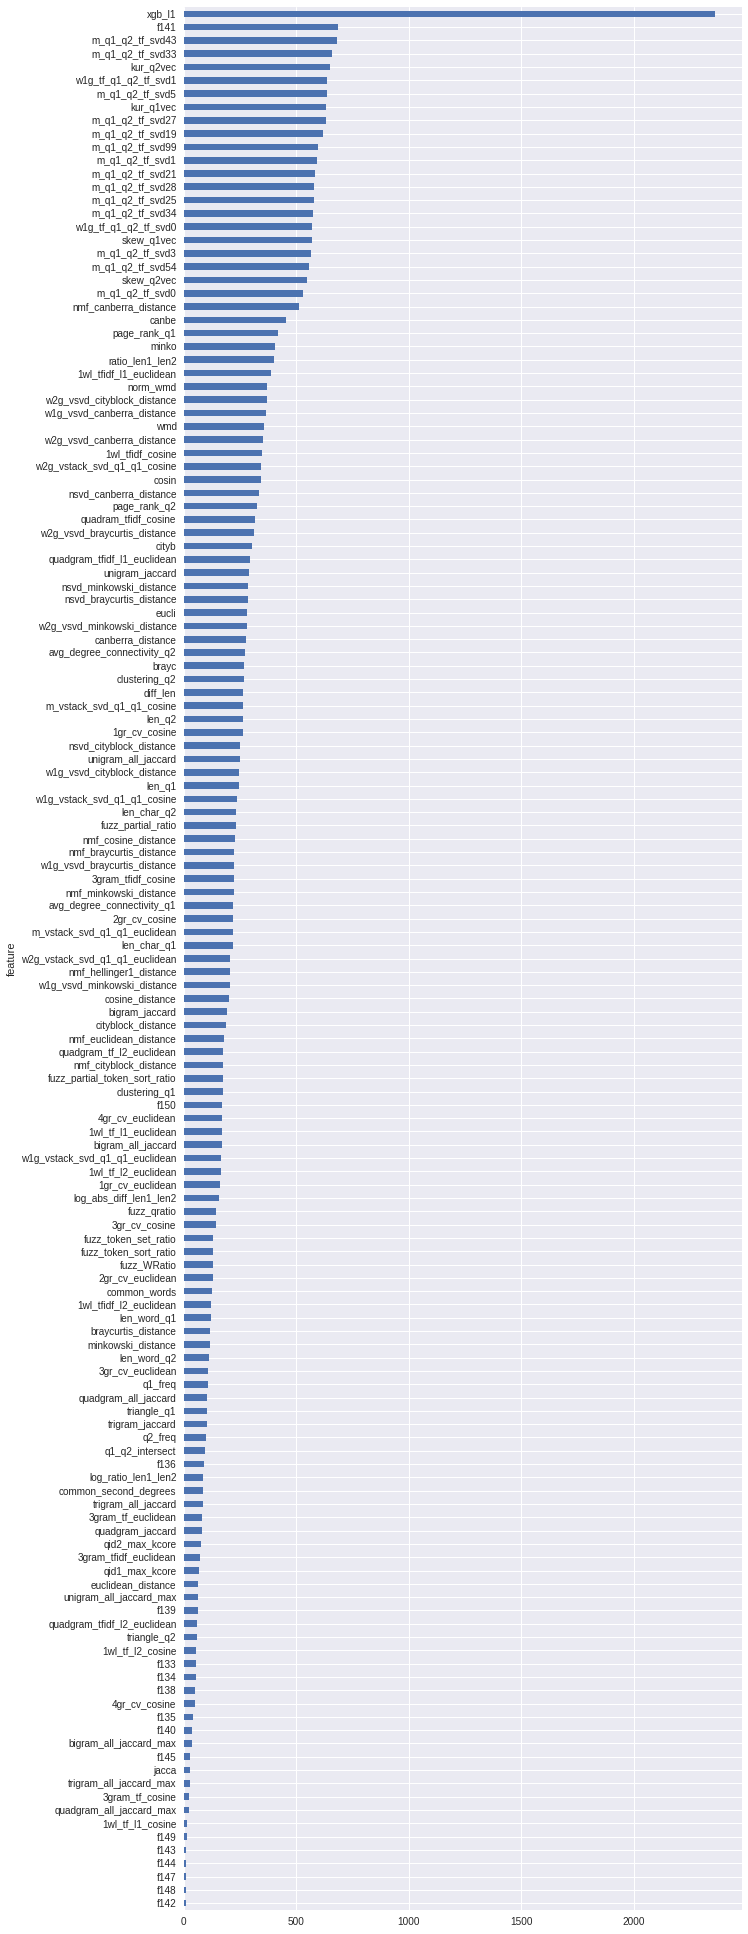

In [72]:
ft.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 35))

In [22]:
# ft.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 25))

In [90]:
d_test = xgb.DMatrix(test_features)
p_test = bst.predict(d_test)
# preds += p_test.reshape(-1,1)

In [91]:
df_test = pd.read_csv(data_home+'test.csv')

sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p_test.ravel()})
sub.head(2)

,is_duplicate,test_id
0,0.000116,0
1,0.124736,1


In [92]:
submission_name = "subm/xgb_1fold_extrasvdv2.csv"

sub.to_csv(path+submission_name, index=False)
FileLink(submission_name)

/home/ubuntu/quora/subm/xgb_1fold_extrasvdv2.csv

### SSS

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1 ,random_state=2219)
splits = sss.split(train_features, labels)




In [37]:

preds_last_shot = np.zeros((test_features.shape[0],1))
d_test = xgb.DMatrix(test_features)



for ix_fit, ix_valid in tqdm_notebook(splits, total=num_folds):
    y_val = labels[ix_valid]
    y_train = labels[ix_fit]

                                           
    d_train = xgb.DMatrix(train_features[ix_fit],label= y_train)
    d_valid = xgb.DMatrix(train_features[ix_valid],label= y_val)
        

    
    
    ############## TRAINING
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    bst = xgb.train(xgb_params, d_train, 10000,  watchlist, early_stopping_rounds=50, verbose_eval=10)
    
#     xgb_models.append(bst)

    ################ OOF 
#     y_oof[ix_valid]= bst.predict(d_valid).reshape(-1,1)
#     xgb_models.append(bst)

    
    ################ Test prediction 
    p_test = bst.predict(d_test)
    preds_last_shot =  p_test.reshape(-1,1)
    
    
    save_array("data/results/xgb_5fold_s2019_test_preds_unusual_preds_last_shot.dat",preds_last_shot)
#     save_array("data/results/xgb_5fold_s2019_oof_preds_unusual.dat",y_oof)
    

[0]	train-logloss:0.649787	valid-logloss:0.650089
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.40878	valid-logloss:0.411727
[20]	train-logloss:0.314645	valid-logloss:0.319351
[30]	train-logloss:0.270473	valid-logloss:0.2768
[40]	train-logloss:0.247136	valid-logloss:0.254852
[50]	train-logloss:0.234246	valid-logloss:0.243176
[60]	train-logloss:0.225879	valid-logloss:0.235991
[70]	train-logloss:0.219799	valid-logloss:0.231094
[80]	train-logloss:0.214841	valid-logloss:0.227622
[90]	train-logloss:0.210759	valid-logloss:0.225077
[100]	train-logloss:0.206778	valid-logloss:0.222796
[110]	train-logloss:0.203663	valid-logloss:0.22115
[120]	train-logloss:0.200435	valid-logloss:0.219616
[130]	train-logloss:0.197596	valid-logloss:0.218373
[140]	train-logloss:0.195274	valid-logloss:0.217262
[150]	train-logloss:0.192929	valid-logloss:0.216332
[160]	train-logloss:0.19064	vali

In [42]:
preds_last_shot.shape

(2345796, 1)

there's still half an hour left .. doing another round with a different seed

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1 ,random_state=51)
splits = sss.split(train_features, labels)



preds_last_shot2 = np.zeros((test_features.shape[0],1))



for ix_fit, ix_valid in tqdm_notebook(splits, total=num_folds):
    y_val = labels[ix_valid]
    y_train = labels[ix_fit]

                                           
    d_train = xgb.DMatrix(train_features[ix_fit],label= y_train)
    d_valid = xgb.DMatrix(train_features[ix_valid],label= y_val)
        

    
    
    ############## TRAINING
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    bst = xgb.train(xgb_params, d_train, 10000,  watchlist, early_stopping_rounds=50, verbose_eval=10)
    
#     xgb_models.append(bst)

    ################ OOF 
#     y_oof[ix_valid]= bst.predict(d_valid).reshape(-1,1)
#     xgb_models.append(bst)

    
    ################ Test prediction 
    p_test = bst.predict(d_test)
    preds_last_shot2 =  p_test.reshape(-1,1)
    
    
    save_array("data/results/xgb_5fold_s2019_test_preds_unusual_preds_last_shot2.dat",preds_last_shot2)
#     save_array("data/results/xgb_5fold_s2019_oof_preds_unusual.dat",y_oof)
    


### KFold

In [57]:
def set_weights(y_train,y_val):
    
    weight_train = np.ones(len(y_train))
    weight_train *= 0.472001959
    weight_train[y_train==0] = 1.309028344        
    
    
    weight_val = np.ones(len(y_val))
    weight_val *= 0.472001959
    weight_val[y_val==0] = 1.309028344    



    return weight_train, weight_val

set aside test set for blending

In [275]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=2020)
# train_test_split = sss.split(train_features,labels).next()


# train_features_dev = train_features[train_test_split[0]]
# labels_dev = labels[train_test_split[0]]

do 8-fold on dev set 

In [13]:
num_folds = 3  
skf = StratifiedKFold(n_splits=num_folds, random_state=2019)
splits = skf.split(train_features, labels)


In [14]:
xgb_models = []

y_oof = np.zeros((train_features.shape[0],1))
preds = np.zeros((test_features.shape[0],1))
d_test = xgb.DMatrix(test_features)

current_fold = 0

for ix_fit, ix_valid in tqdm_notebook(splits, total=num_folds):
    y_val = labels[ix_valid]
    y_train = labels[ix_fit]

                                           
    d_train = xgb.DMatrix(train_features[ix_fit],label= y_train)
    d_valid = xgb.DMatrix(train_features[ix_valid],label= y_val)
    
    current_fold+=1
    

    
    
    ############## TRAINING
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    bst = xgb.train(xgb_params, d_train, 3500,  watchlist, early_stopping_rounds=50, verbose_eval=10)
    
    xgb_models.append(bst)

    ################ OOF 
#     y_oof[ix_valid]= bst.predict(d_valid).reshape(-1,1)
#     xgb_models.append(bst)

    
    ################ Test prediction 
    p_test = bst.predict(d_test)
    preds += p_test.reshape(-1,1)
    
    
    save_array("data/results/xgb_5fold_s2019_test_preds_unusual_part{}.dat".format(current_fold),preds)
#     save_array("data/results/xgb_5fold_s2019_oof_preds_unusual.dat",y_oof)
    


[0]	train-logloss:0.660484	valid-logloss:0.660885
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.451404	valid-logloss:0.455644
[20]	train-logloss:0.349862	valid-logloss:0.357261
[30]	train-logloss:0.29428	valid-logloss:0.304322
[40]	train-logloss:0.261936	valid-logloss:0.274062
[50]	train-logloss:0.242088	valid-logloss:0.256092
[60]	train-logloss:0.229448	valid-logloss:0.245118
[70]	train-logloss:0.220344	valid-logloss:0.237645
[80]	train-logloss:0.214029	valid-logloss:0.232679
[90]	train-logloss:0.209426	valid-logloss:0.229126
[100]	train-logloss:0.205212	valid-logloss:0.226325
[110]	train-logloss:0.201727	valid-logloss:0.224142
[120]	train-logloss:0.198342	valid-logloss:0.222433
[130]	train-logloss:0.194824	valid-logloss:0.220815
[140]	train-logloss:0.191672	valid-logloss:0.219401
[150]	train-logloss:0.188772	valid-logloss:0.218258
[160]	train-logloss:0.18581	v

[540]	train-logloss:0.117362	valid-logloss:0.205404
[550]	train-logloss:0.116053	valid-logloss:0.205309
[560]	train-logloss:0.114759	valid-logloss:0.205258
[570]	train-logloss:0.113458	valid-logloss:0.205144
[580]	train-logloss:0.112108	valid-logloss:0.20504
[590]	train-logloss:0.111128	valid-logloss:0.204938
[600]	train-logloss:0.109884	valid-logloss:0.204874
[610]	train-logloss:0.108564	valid-logloss:0.204814
[620]	train-logloss:0.107466	valid-logloss:0.204768
[630]	train-logloss:0.106385	valid-logloss:0.204663
[640]	train-logloss:0.105287	valid-logloss:0.204588
[650]	train-logloss:0.10428	valid-logloss:0.204525
[660]	train-logloss:0.103071	valid-logloss:0.204462
[670]	train-logloss:0.101893	valid-logloss:0.204386
[680]	train-logloss:0.100585	valid-logloss:0.204323
[690]	train-logloss:0.099351	valid-logloss:0.204217
[700]	train-logloss:0.098089	valid-logloss:0.20415
[710]	train-logloss:0.097151	valid-logloss:0.204115
[720]	train-logloss:0.096262	valid-logloss:0.204038
[730]	train-log

[301]	train-logloss:0.192704	valid-logloss:0.202844

In [15]:
preds_avg = preds / float(num_folds) #devide by number of folds  

In [16]:
save_array("data/results/xgb_3fold_s2019_test_preds_unusual.dat",preds_avg)
# save_array("data/results/xgb_5fold_s2019_oof_preds_nmf_pseudo.dat",y_oof)

In [212]:
# plt.hist(preds_avg,bins=50)

In [214]:
# plt.hist(link_function(preds_avg),bins=50)

In [87]:
# def create_feature_map(features):
#     outfile = open('xgb.fmap', 'w')
#     i = 0
#     for feat in features:
#         outfile.write('{0}\t{1}\tq\n'.format(i, feat))
#         i = i + 1
#     outfile.close()
# xgb.plot_importance(bst)

In [215]:
# d_test = xgb.DMatrix(test_features)
# p_test = bst.predict(d_test)
# p_test = link_function(p_test)

In [43]:
p_test = link_function(preds_last_shot)

In [44]:
df_test = pd.read_csv(data_home+'test.csv')

sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p_test.ravel()})
sub.head(2)

,is_duplicate,test_id
0,0.000027,0
1,0.035027,1


In [45]:
submission_name = "subm/xgb_3fold_unusual_nolstm.csv"

sub.to_csv(path+submission_name, index=False)
FileLink(submission_name)

/home/ubuntu/quora/subm/xgb_3fold_unusual_nolstm.csv

In [68]:
# plt.rcParams['figure.figsize'] = 16, 12

# # sns.distplot(preds_avg,label="pseudo"),sns.distplot(xgb_1l_test_preds,label='xgb')

# plt.legend(loc='upper right', prop={'size': 18})
# plt.title('Distribution of oof predictions', fontsize=20)

### Stacking 

In [69]:
from sklearn.ensemble import *

clfs = [
#         ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini',verbose=0),
# #     GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=9, n_estimators=500,verbose=1),
#         ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='entropy',verbose=0),
#         RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='gini',verbose=0),
        RandomForestClassifier(n_estimators=1000, n_jobs=-1, criterion='entropy',verbose=1, max_depth=9)
]

In [64]:
dataset_blend_train = np.zeros((train_features.shape[0], len(clfs)+1)) # +1 for xgboost results
dataset_blend_test = np.zeros((test_features.shape[0], len(clfs)+1))


In [65]:
num_folds = 5
X = train_features
X_submission = test_features
y = labels

skf = StratifiedKFold(n_splits=num_folds, random_state=2019)
skf  = list(skf.split(X, y))

In [66]:
np.any(np.isnan(X)), np.all(np.isfinite(X))

(False, True)

In [67]:
X = np.clip(X,X.min(),1e7)
X_submission = np.clip(X_submission,X_submission.min(),1e7)

In [11]:
# dataset_blend_train =   load_array("data/cache/dataset_blend_train_v1.dat")
# dataset_blend_test =    load_array("data/cache/dataset_blend_test_v1.dat")

In [ ]:
%%time 

for j, clf in enumerate(clfs):
    print j, clf
 
        
        
    dataset_blend_test_j = np.zeros((test_features.shape[0], num_folds))
    
    


    for i, (train, test) in enumerate(skf):
        print "Fold", i
        
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        
#         print X_train.shape, y_train.shape, X_test.shape, y_test.shape
        clf.fit(X_train, y_train)
        
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_submission)[:, 1]
        
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)
    
    #caching to avoid dead-kernel interruptions 
    save_array("data/cache/dataset_blend_train_v1.dat",dataset_blend_train)
    save_array("data/cache/dataset_blend_test_v1.dat",dataset_blend_test)


0 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)
Fold 0


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.6min finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    9.0s


In [13]:
dataset_blend_train.shape, dataset_blend_test.shape

((404290, 5), (2345796, 5))

In [45]:
dataset_blend_train[:,4]

array([  4.24634665e-02,   6.59618014e-03,   4.29204762e-01, ...,
         2.81577948e-02,   2.92460697e-07,   8.89144659e-01])

In [24]:
xgb_preds = load_array("data/results/xgb_5fold_s2019_test_preds_maxcore.dat")
xgb_y_oof = load_array("data/results/xgb_5fold_s2019_oof_preds_maxcore.dat")

In [34]:
dataset_blend_train[:,len(clfs)] = xgb_y_oof.ravel()
dataset_blend_test[:,len(clfs)] = xgb_preds.ravel()


In [32]:
len(clfs)

4

In [62]:
avg_blend_preds = dataset_blend_test.mean(axis=1)
avg_blend_preds[0:2]

array([  1.40080047e-04,   2.09554631e-01])

#### Blending

In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(dataset_blend_train, y)
y_submission = clf.predict_proba(dataset_blend_test) [:, 1]

In [53]:
link_function(y_submission).max()

0.94942818288017461

In [57]:
# print "Linear stretch of predictions to [0,1]"
# y_submission = (y_submission - y_submission.min()) / (y_submission.max() - y_submission.min())

#### Submission

In [59]:
df_test = pd.read_csv(data_home+'test.csv')

sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': link_function(y_submission)})
sub.head(2)

,is_duplicate,test_id
0,0.008158,0
1,0.039296,1


In [60]:
submission_name = "subm/blendingv1.csv"

sub.to_csv(path+submission_name, index=False)
FileLink(submission_name)

/home/ubuntu/quora/subm/blendingv1.csv